## Install

In [3]:
!pip install numpy pandas matplotlib seaborn

In [4]:
import numpy as np # for working with data
import seaborn as sns # for making visualizations

In [5]:
import pandas as pd;
import matplotlib.pyplot as plt
police_df = pd.read_csv("US Police shootings in from 2015-22.csv", low_memory=False);

In [6]:
from matplotlib import pyplot as plt # for making visualizations

## Preprocessing

In [7]:
police_df.head() #Checking the head of the data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [8]:
police_df.columns #seeing all the columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [9]:
police_df.shape #7729 rows, 17 columns before pre-processing

(7729, 17)

In [10]:
# longitude, latitude and is_geocoding_exact can be removed. 
# they won't be necessary as we have city and state and would be more
# suitable for our purpose

In [11]:
police_df.isnull().sum()
# the sum of all rows with null value

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [12]:
del police_df['is_geocoding_exact']

In [13]:
del police_df['latitude']

In [14]:
del police_df['longitude']

In [55]:
del police_df['name']

In [57]:
police_df.columns

Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'year', 'month', 'day'],
      dtype='object')

In [58]:
police_df = police_df.dropna()

In [59]:
police_df.isnull().sum()

id                         0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
year                       0
month                      0
day                        0
dtype: int64

In [18]:
police_df.shape

(5452, 14)

In [19]:
# no more nulls in the data

In [60]:
police_df.columns

Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race',
       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
       'body_camera', 'year', 'month', 'day'],
      dtype='object')

In [21]:
import datetime

In [22]:
police_df['date'] = pd.to_datetime(police_df['date'])

In [23]:
police_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

In [24]:
#Testing if it works
police_df.loc[1, 'date'].day_name()

'Friday'

In [25]:
police_df.loc[35, 'date'].month_name()

'January'

## Understanding the data

In [26]:
police_df['armed'].unique()
# Checking all unique values for 'armed' column.
# These are items that shooting victims were holding
# Some of the items are interesting

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'BB gun',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'crossbow', 'unknown weapon',
       'binoculars', 'pellet gun', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'pair of scissors', 'pole', 'pick-axe',
       'flashlight', 'spear', 'chair', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'baton', 'crowbar',

In [27]:
police_df['manner_of_death'].unique()
# Considering the data is about police shootings, it would make sense
# that being shot is in this column

array(['shot', 'shot and Tasered'], dtype=object)

In [28]:
police_df['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [29]:
police_df['year'] = police_df['date'].dt.year
police_df['month'] = police_df['date'].dt.month_name()
police_df['day'] = police_df['date'].dt.day_name()

In [61]:
police_df.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,1,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,January,Friday
1,2,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,January,Friday
2,3,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,January,Saturday
3,4,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,January,Sunday
4,5,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,January,Sunday


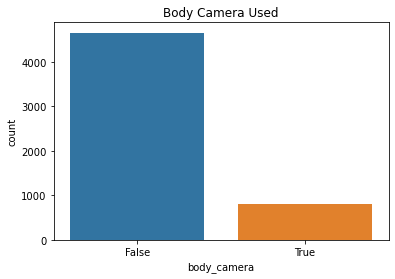

In [31]:
sns.countplot(x='body_camera', data=police_df)
plt.title("Body Camera Used")
plt.show()

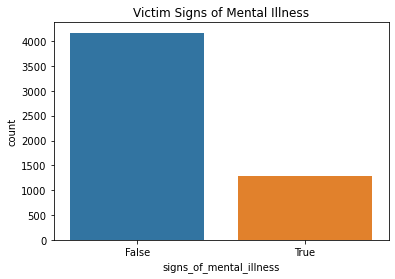

In [32]:
sns.countplot(x='signs_of_mental_illness', data=police_df)
plt.title("Victim Signs of Mental Illness")
plt.show()

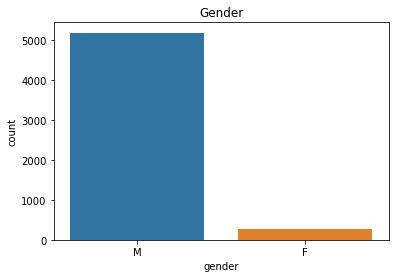

In [33]:
sns.countplot(x='gender', data=police_df)
plt.title("Gender")
plt.show()

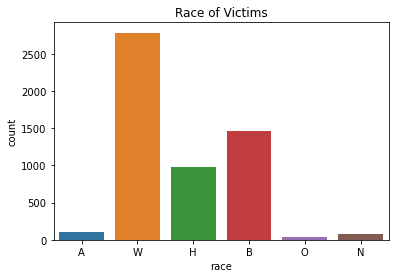

In [34]:
sns.countplot(x='race', data=police_df)
plt.title("Race of Victims")
plt.show()

In [35]:
police_df['race'].value_counts()

W    2785
B    1468
H     976
A      99
N      82
O      42
Name: race, dtype: int64

In [36]:
police_df['gender'].value_counts()

M    5190
F     262
Name: gender, dtype: int64

In [37]:
police_df['manner_of_death'].value_counts()

shot                5171
shot and Tasered     281
Name: manner_of_death, dtype: int64

In [38]:
police_df['threat_level'].value_counts()

attack          3581
other           1746
undetermined     125
Name: threat_level, dtype: int64

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Police Shootings per Year')

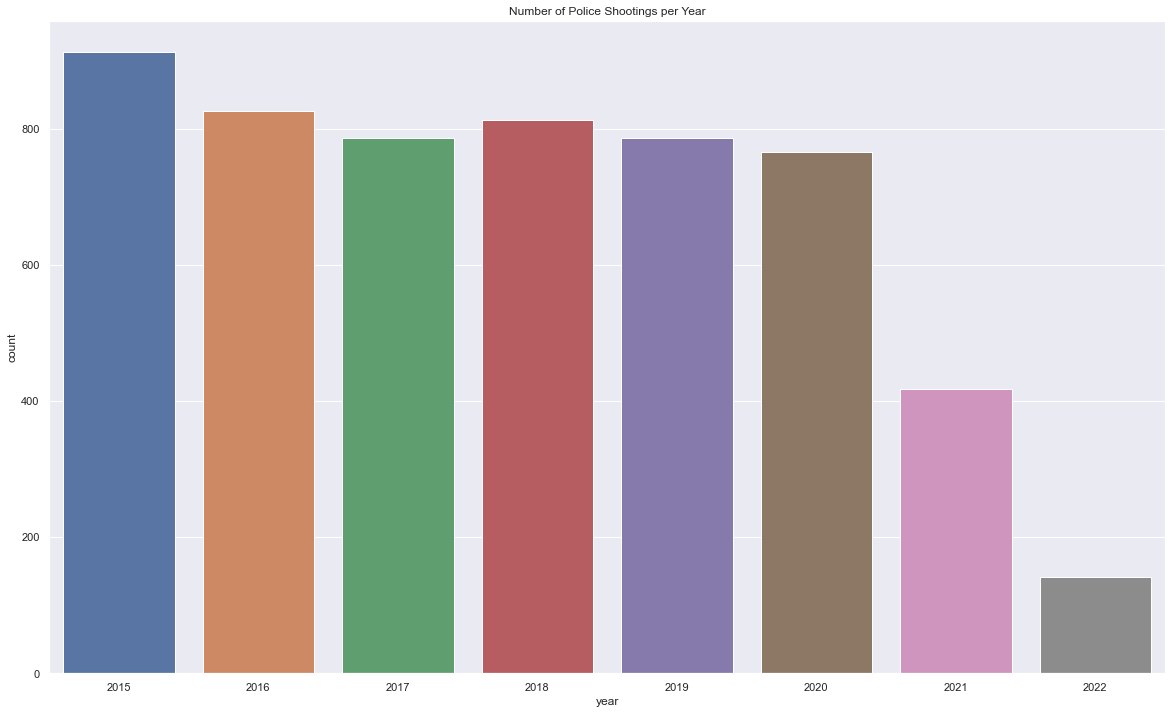

In [39]:
sns.set(rc={"figure.figsize":(20,12)})

ax = sns.countplot(police_df['year'])
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Number of Police Shootings per Year")

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Police Shootings by Month')

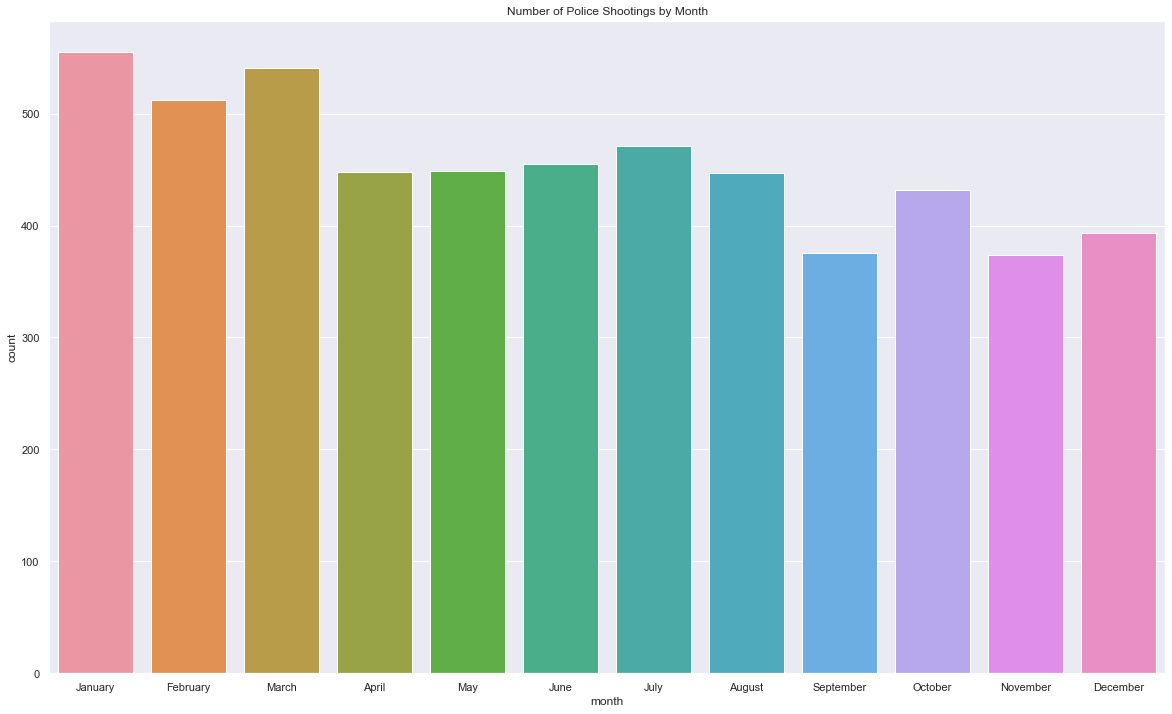

In [40]:
sns.set(rc={"figure.figsize":(20,12)})

ax = sns.countplot(police_df['month'])
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Number of Police Shootings by Month")

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Weaponry Used by Victims')

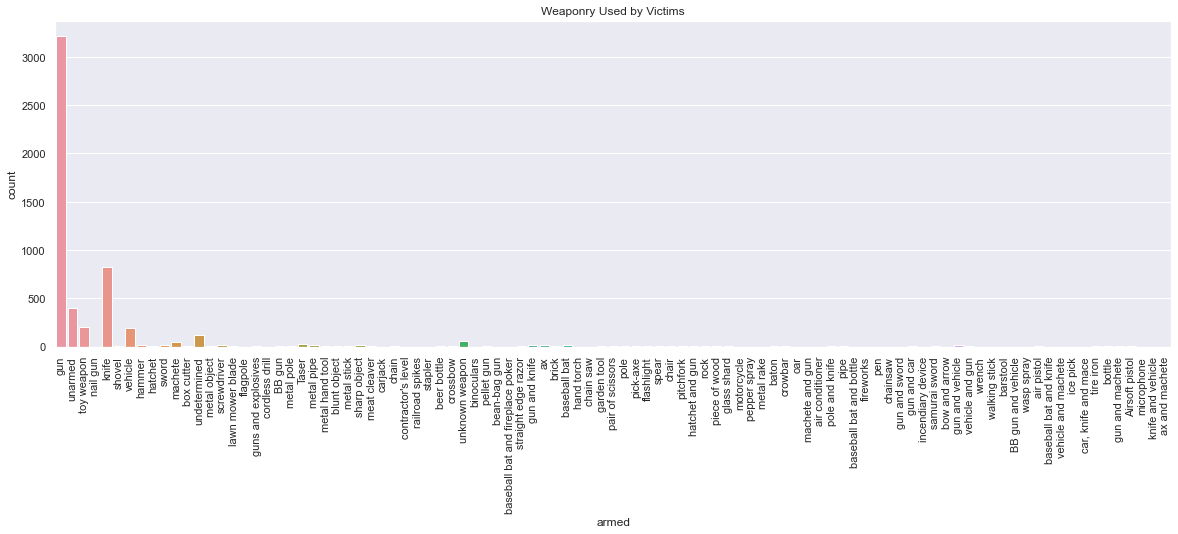

In [41]:
sns.set(rc={"figure.figsize":(20,6)})

ax = sns.countplot(police_df['armed'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
ax= plt.gca()
ax.set_title("Weaponry Used by Victims")

In [42]:
police_df['manner_of_death'].value_counts()

shot                5171
shot and Tasered     281
Name: manner_of_death, dtype: int64

In [43]:
police_df['flee'].value_counts()

Not fleeing    3565
Car             849
Foot            810
Other           228
Name: flee, dtype: int64

In [44]:
df_2015 = police_df[police_df['year'] == 2015]
df_2016 = police_df[police_df['year'] == 2016]
df_2017 = police_df[police_df['year'] == 2017]
df_2018 = police_df[police_df['year'] == 2018]
df_2019 = police_df[police_df['year'] == 2019]
df_2020 = police_df[police_df['year'] == 2020]
df_2021 = police_df[police_df['year'] == 2021]
df_2022 = police_df[police_df['year'] == 2022]

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Police Shootings by Month, 2015')

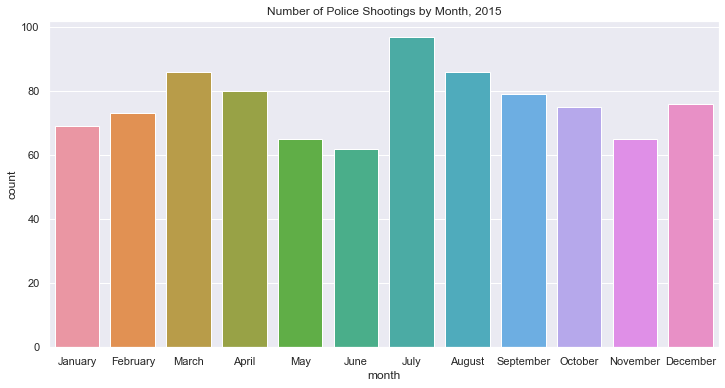

In [45]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.countplot(df_2015['month'])
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Number of Police Shootings by Month, 2015")

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Police Shootings by Month, 2016')

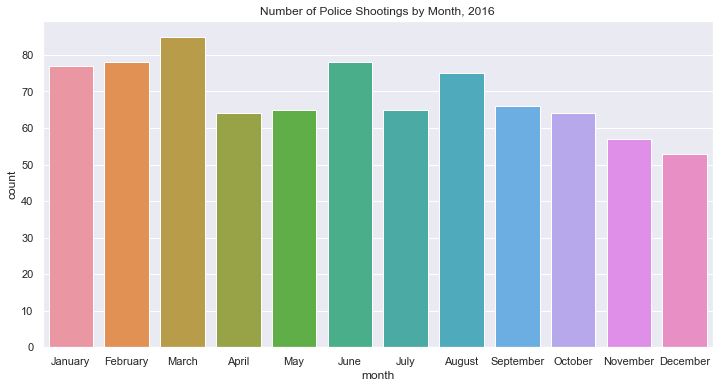

In [46]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.countplot(df_2016['month'])
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Number of Police Shootings by Month, 2016")

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Police Shootings by Month, 2020')

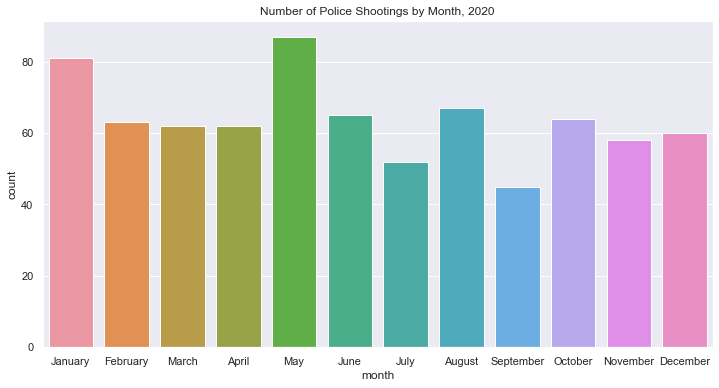

In [47]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.countplot(df_2020['month'])
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Number of Police Shootings by Month, 2020")

C:\Users\agpju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Police Shootings by Month, 2021')

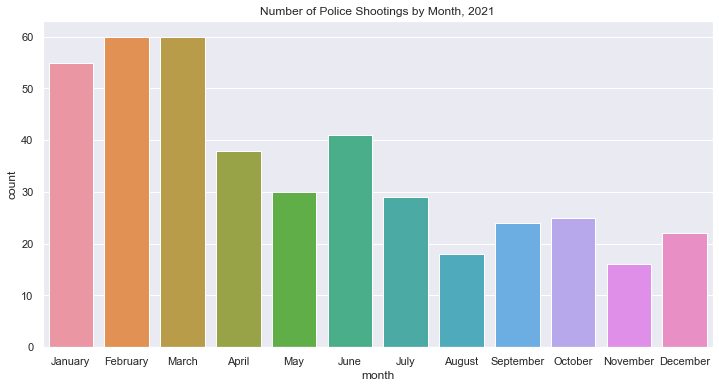

In [48]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.countplot(df_2021['month'])
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Number of Police Shootings by Month, 2021")

Text(0.5, 1.0, 'Age of shooting victims in 2016')

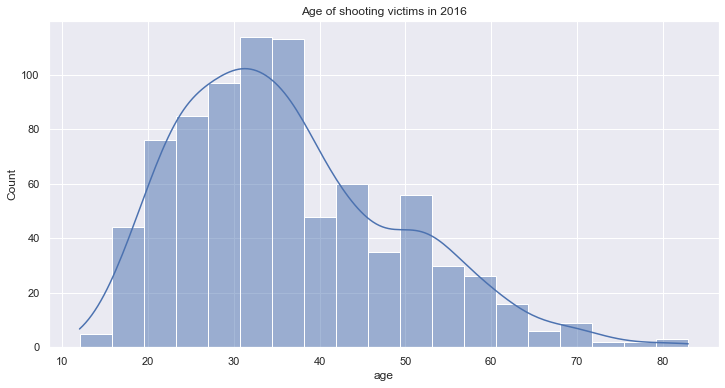

In [49]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.histplot(df_2016['age'], kde=True)
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Age of shooting victims in 2016")

Text(0.5, 1.0, 'Age of shooting victims in 2015-2022')

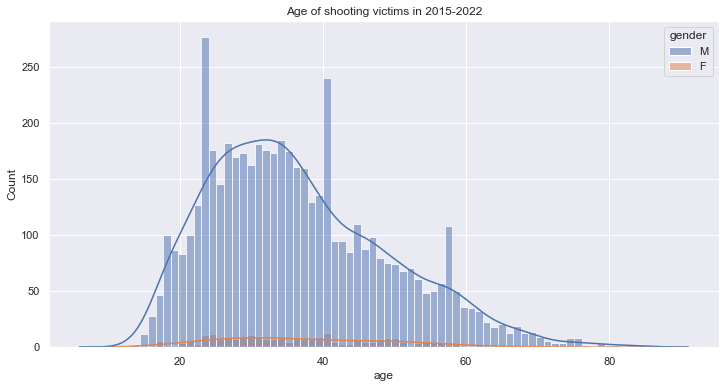

In [50]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.histplot(data=police_df, x='age', hue='gender', bins=80, kde=True)
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Age of shooting victims in 2015-2022")

Text(0.5, 1.0, 'Age of shooting victims in 2015-2022')

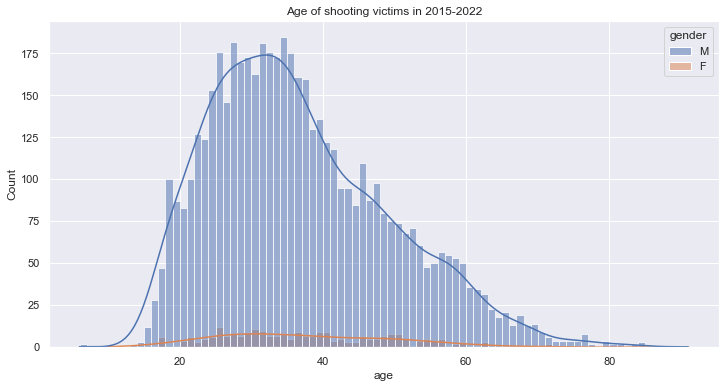

In [51]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.histplot(data=police_df, x='age', hue='gender', bins=50, binwidth=1,kde=True)
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Age of shooting victims in 2015-2022")

Text(0.5, 1.0, 'Race of shooting victims in 2015-2022')

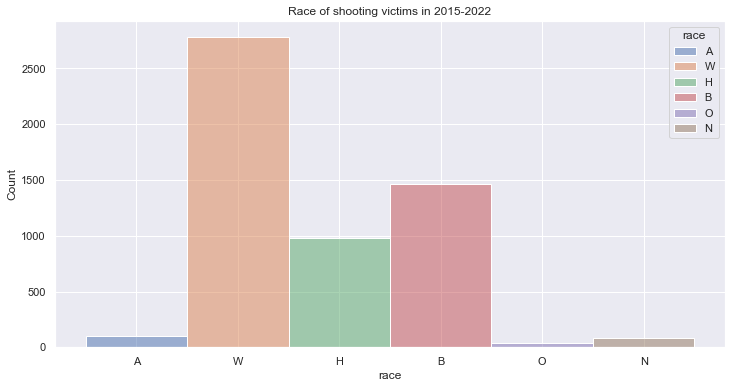

In [52]:
sns.set(rc={"figure.figsize":(12,6)})

ax = sns.histplot(data=police_df, x='race',hue='race', kde=False)
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Race of shooting victims in 2015-2022")

In [53]:
# Continue on by making visualizations using States and Cities. See if we can get a 
# heatmap or something of the US map

Text(0.5, 1.0, 'States with most police shootings')

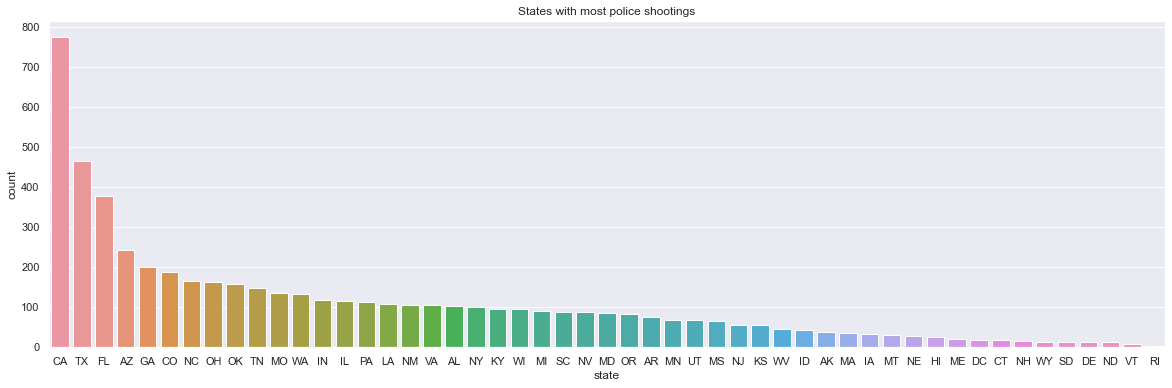

In [63]:
#chart for states with most police shootings
sns.set(rc={"figure.figsize":(20,6)})
ax = sns.countplot(data=police_df, x='state', order=police_df['state'].value_counts().index)
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("States with most police shootings")

In [64]:
#number of shootings in CA
police_df[police_df['state'] == 'CA'].count()

id                         776
date                       776
manner_of_death            776
armed                      776
age                        776
gender                     776
race                       776
city                       776
state                      776
signs_of_mental_illness    776
threat_level               776
flee                       776
body_camera                776
year                       776
month                      776
day                        776
dtype: int64

Text(0.5, 1.0, 'Cities with most police shootings')

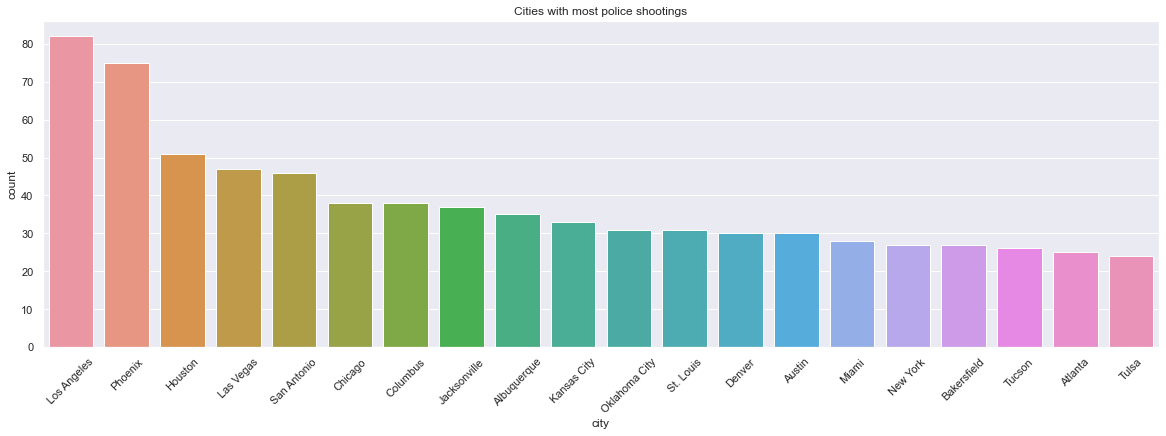

In [71]:
#10 cities with the most police shootings
sns.set(rc={"figure.figsize":(20,6)})
ax = sns.countplot(data=police_df, x='city', order=police_df['city'].value_counts().head(20).index)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
ax= plt.gca()
ax.set_title("Cities with most police shootings")

Text(0.5, 1.0, 'Police usage of body camera per year for 2015-2022')

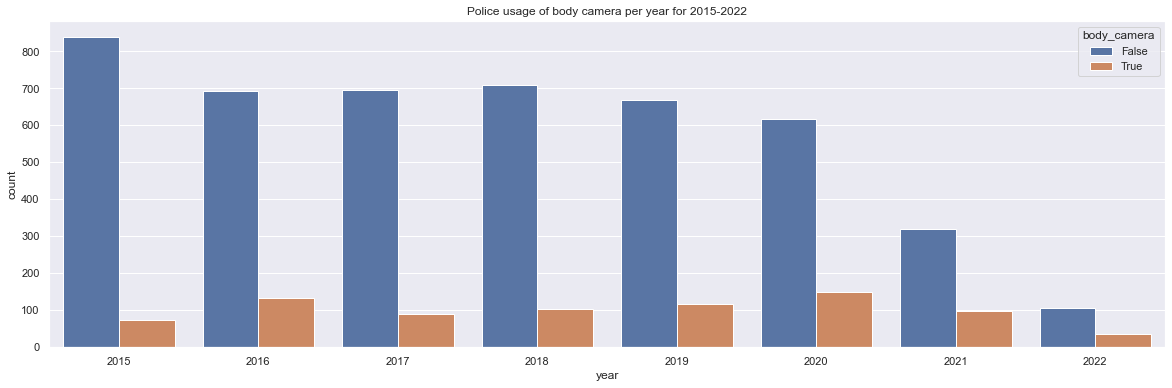

In [68]:
#Police usage of body camera per year for 2015-2022
sns.set(rc={"figure.figsize":(20,6)})
ax = sns.countplot(data=police_df, x='year', hue='body_camera')
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
ax.set_title("Police usage of body camera per year for 2015-2022")

Text(0.5, 1.0, 'Body Camera Usage In 50 States (2015-2022)')

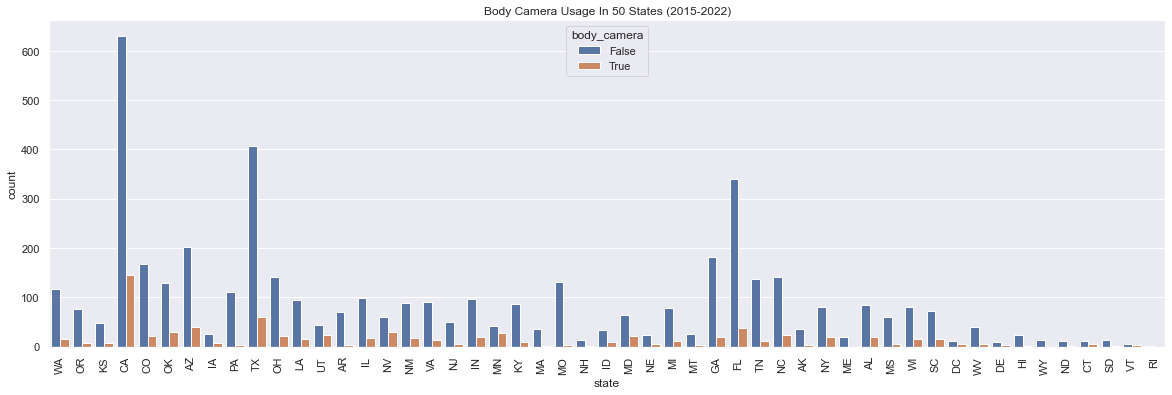

In [75]:
#Body Camera usage for every state
sns.set(rc={"figure.figsize":(20,6)})
ax = sns.countplot(data=police_df, x='state', hue='body_camera')
plt.ticklabel_format(style='plain', axis='y')
ax= plt.gca()
plt.xticks(rotation=90)
ax.set_title("Body Camera Usage In 50 States (2015-2022)")

# Modeling

In [76]:
#install sklearn
!pip install sklearn
#import train_test_split
from sklearn.model_selection import train_test_split
!pip install scikit-learn

In [78]:
#get dummies
dummy_df = pd.get_dummies(police_df, columns = ['manner_of_death','armed','gender', 'race','flee'], drop_first=True)

In [79]:
dummy_df.head()

,id,date,age,city,state,signs_of_mental_illness,threat_level,body_camera,year,month,...,armed_wrench,gender_M,race_B,race_H,race_N,race_O,race_W,flee_Foot,flee_Not fleeing,flee_Other
0,1,2015-01-02,53.0,Shelton,WA,True,attack,False,2015,January,...,0,1,0,0,0,0,0,0,1,0
1,2,2015-01-02,47.0,Aloha,OR,False,attack,False,2015,January,...,0,1,0,0,0,0,1,0,1,0
2,3,2015-01-03,23.0,Wichita,KS,False,other,False,2015,January,...,0,1,0,1,0,0,0,0,1,0
3,4,2015-01-04,32.0,San Francisco,CA,True,attack,False,2015,January,...,0,1,0,0,0,0,1,0,1,0
4,5,2015-01-04,39.0,Evans,CO,False,attack,False,2015,January,...,0,1,0,1,0,0,0,0,1,0


In [80]:
X = dummy_df.drop(columns = ['id','date','threat_level','month','day','city', 'state'])
y = dummy_df['threat_level']

In [81]:
#80 train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
#train test shape
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (4361, 110)
X_test (1091, 110)
y_train (4361,)
y_test (1091,)


In [83]:
#import tree
from sklearn import tree

In [84]:
#instantiate decision tree class
clf = tree.DecisionTreeClassifier()

In [85]:
#fit training data to the model
clf = clf.fit(X_train, y_train)

In [86]:
#predict values from X_test
predicted = clf.predict(X_test)
predicted

array(['other', 'other', 'attack', ..., 'attack', 'attack', 'attack'],
      dtype=object)

In [87]:
#score
clf.score(X_test, y_test)

0.6278643446379468

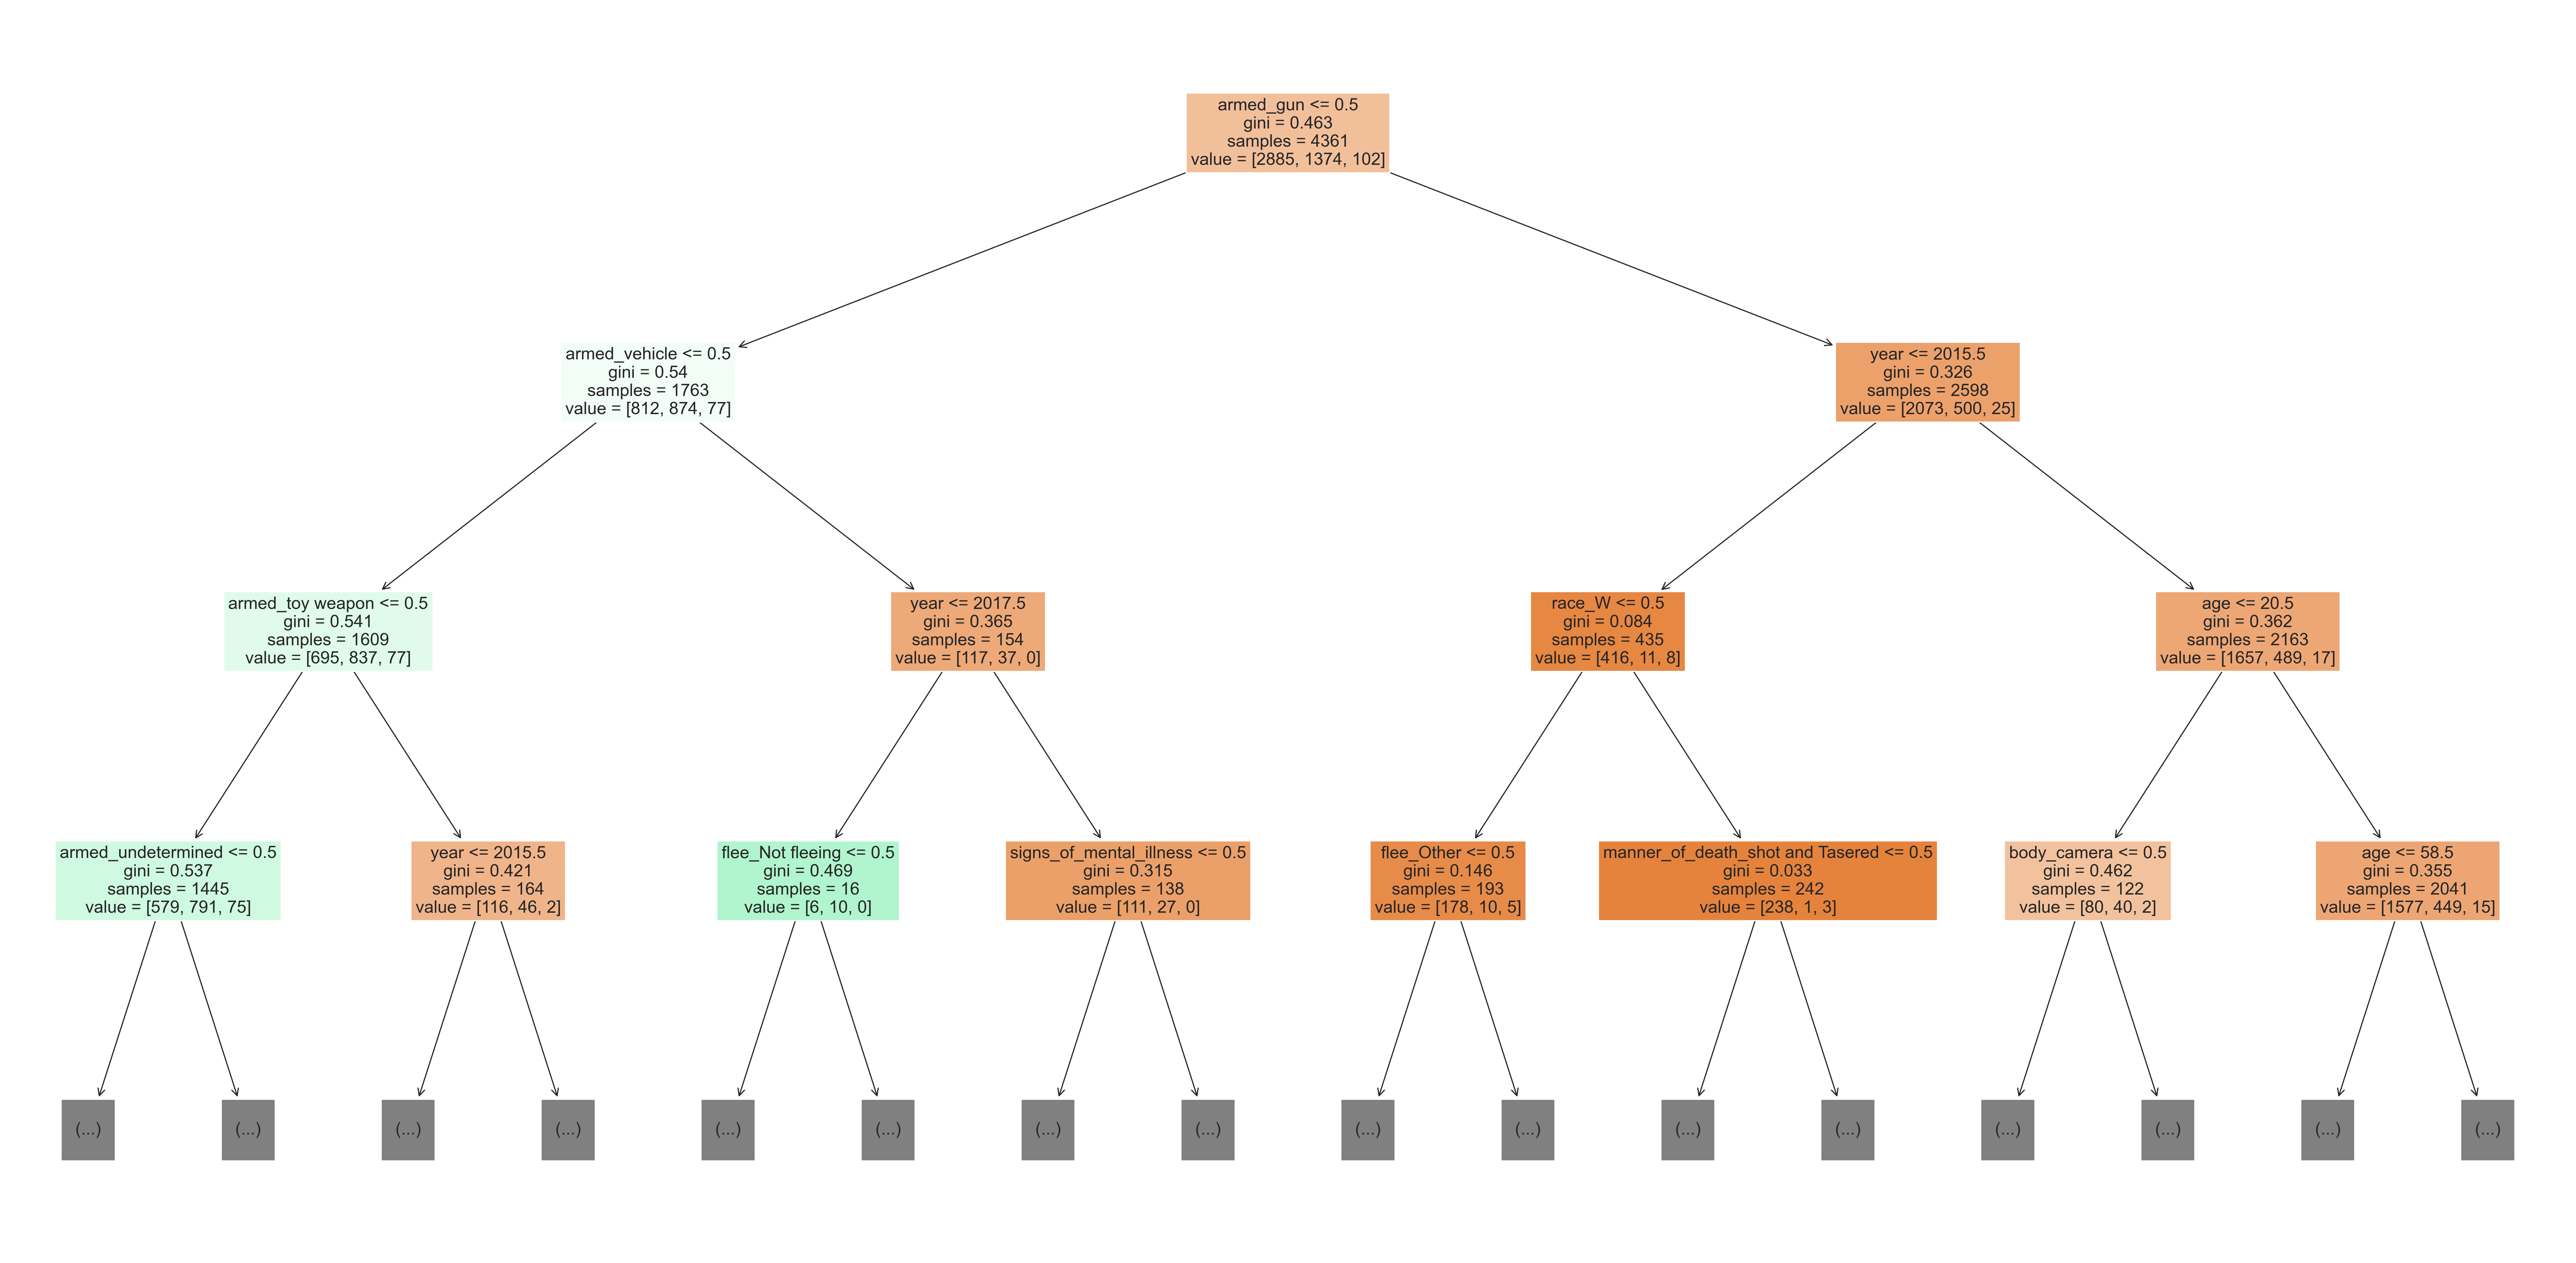

In [91]:
#Decision tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (40,20), dpi=300)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns, fontsize=15, filled = True)
plt.show()

In [89]:
#Feature importance array
fi = clf.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending = False, inplace = True)

C:\Users\agpju\AppData\Local\Temp\ipykernel_5128\3867681885.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


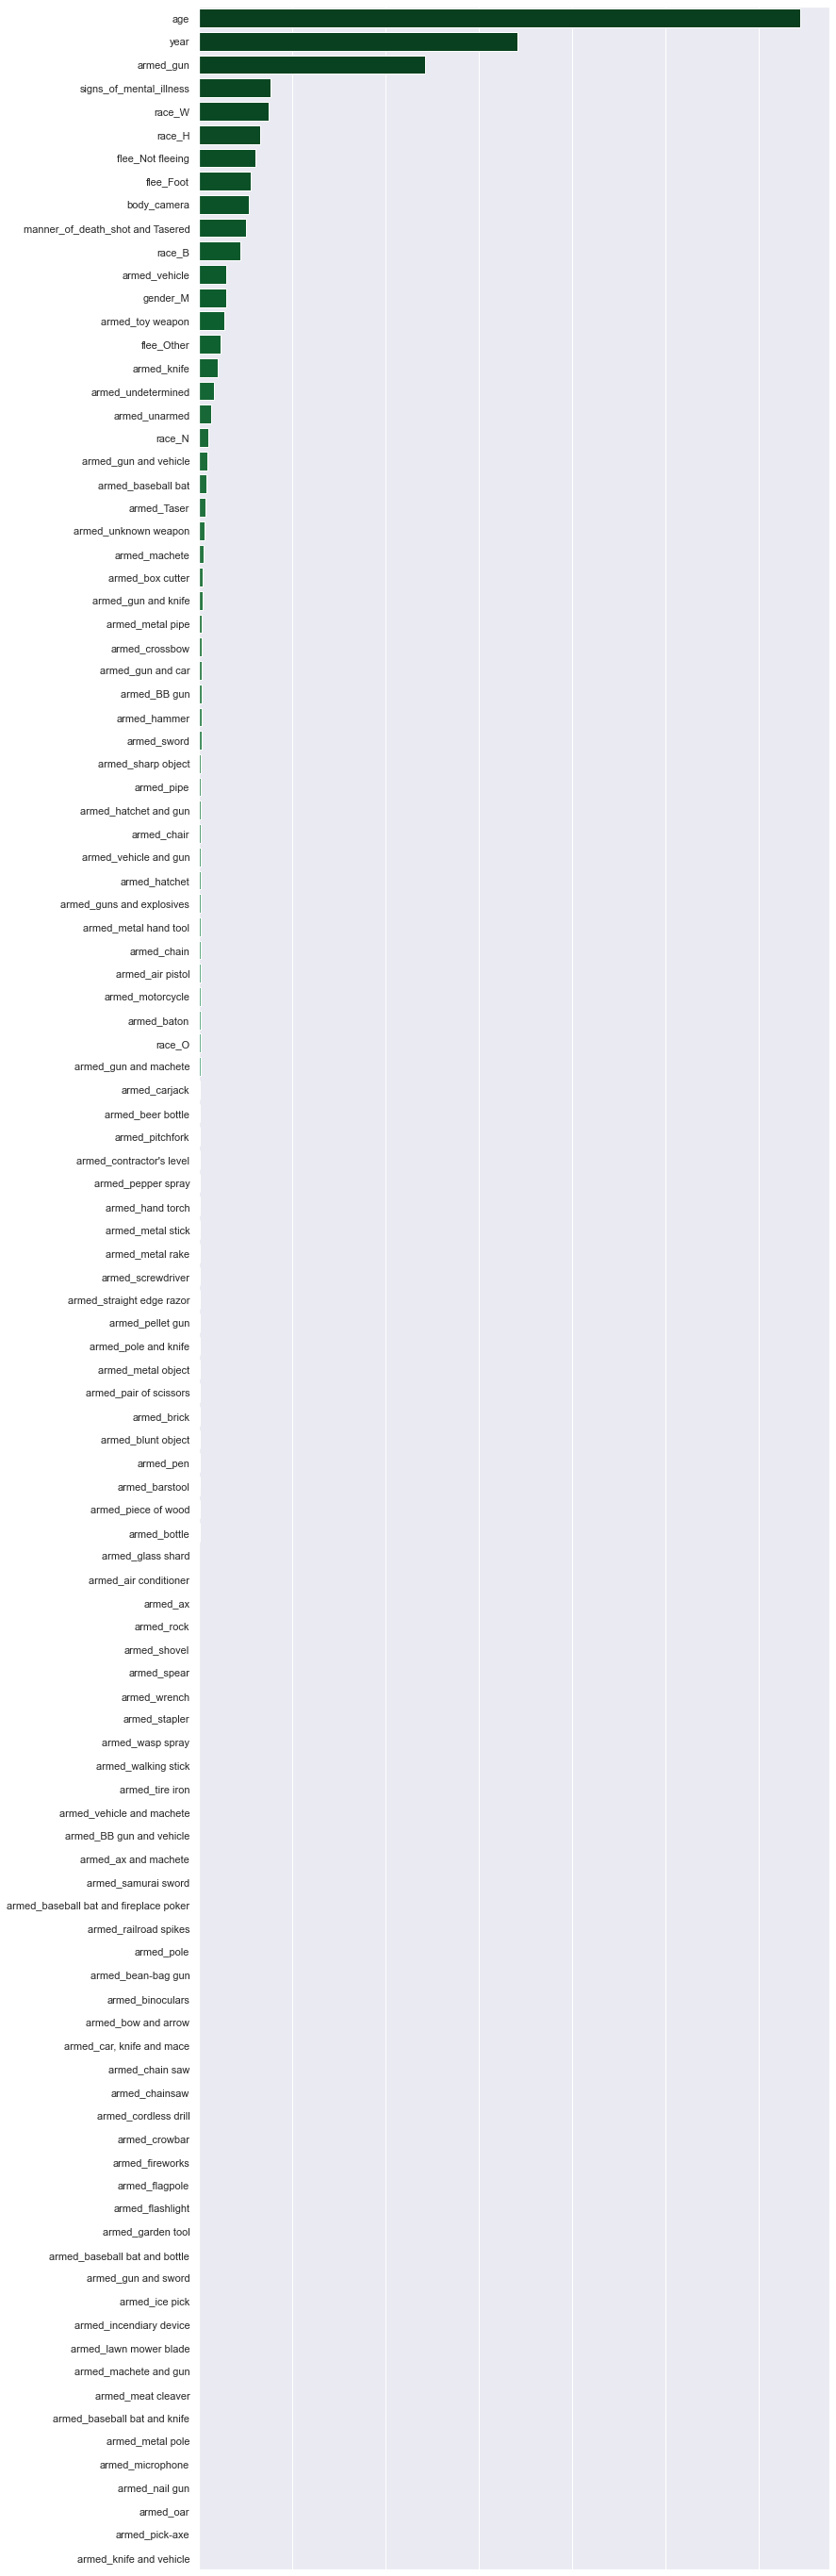

In [90]:
#Bar plot for feature importance
plt.figure(figsize=(12, 50))
chart = sns.barplot(x = fi, y = fi.index, palette = sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [93]:
from sklearn import metrics

In [97]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

      attack       0.71      0.75      0.73       696
       other       0.48      0.42      0.45       372
undetermined       0.24      0.26      0.25        23

    accuracy                           0.63      1091
   macro avg       0.47      0.48      0.48      1091
weighted avg       0.62      0.63      0.62      1091



In [95]:
police_df = police_df.replace({'threat_level': {'attack': 1, 'other': 0, 'undetermined': 0}})

In [96]:
police_df.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,1,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,1,Not fleeing,False,2015,January,Friday
1,2,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,1,Not fleeing,False,2015,January,Friday
2,3,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,0,Not fleeing,False,2015,January,Saturday
3,4,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,1,Not fleeing,False,2015,January,Sunday
4,5,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,1,Not fleeing,False,2015,January,Sunday


In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
confusion_matrix(y_test, predicted)

array([[523, 164,   9],
       [206, 156,  10],
       [  9,   8,   6]], dtype=int64)